In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import os, sys

from sklearn.cluster import AgglomerativeClustering
from sklearn.externals import joblib

%matplotlib inline
%config InlineBackend.figure_format = 'jpg'

samples: 44100
music time: 19.983673469387757
The shape of input X: (25, 21504)
Cluster ID [0 0 0 0 0 4 3 0 0 0 1 2 0 0 0 5 4 3 0 0 0 1 2 0 0]


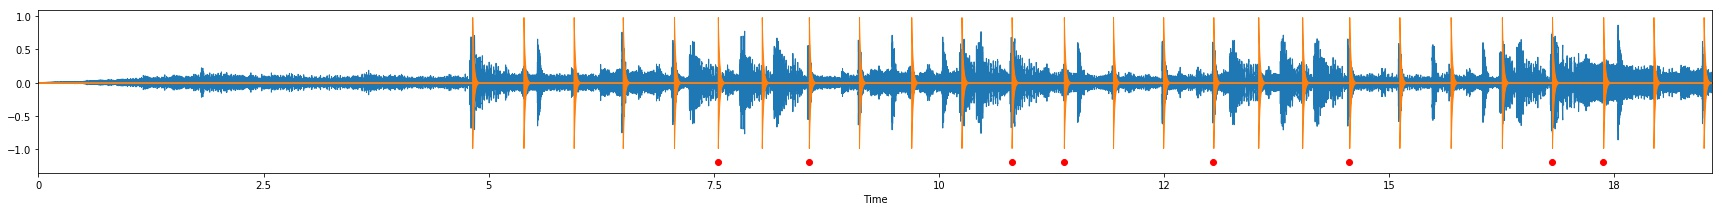

In [54]:
data, sr = librosa.load('../data/MyDownfall.mp3', sr=None)
print('samples:', sr)
# 获取音乐时长
t = librosa.get_duration(data, sr)
print('music time:', t)
frames = librosa.samples_to_frames(data)
# 获取节拍
tempo, beats = librosa.beat.beat_track(y=data, sr=sr)
# 节拍对应时间
beat_times = librosa.frames_to_time(beats, sr=sr)
y_beat_times = librosa.clicks(times=beat_times, sr=sr)


# AgglomerativeClustering 合并segment
beat_samples = librosa.frames_to_samples(beats)
interval = min([beat_samples[i]-beat_samples[i-1] for i in range(1, len(beat_samples))])
datax = []
for i in range(1, len(beat_samples)):
    datax.append(data[beat_samples[i-1]: beat_samples[i]][:interval])
datax = np.asarray(datax)
print('The shape of input X:', datax.shape)

n_cluster = 6
clu = AgglomerativeClustering(n_clusters=n_cluster).fit(datax)
print('Cluster ID', clu.labels_)
clu = AgglomerativeClustering().fit(np.array(clu.labels_)[:, np.newaxis])

f, axes = plt.subplots(1, 1, figsize=(30, 3))

# 画出mfcc曲线
librosa.display.waveplot(data, sr=sr, x_axis='time', ax=axes)
# 节拍曲线
librosa.display.waveplot(y_beat_times, sr=sr, ax=axes)

# 画合并segment, 转场点
for i in range(len(clu.labels_)-1):
    t = beat_times[i+1]
    if clu.labels_[i] != clu.labels_[i+1]:
        axes.scatter(t, -1.2, c='r')
    
plt.show()